# Final Capstone: Revisiting the Netflix Prize

## Notebook 5: Variable Distributions and Transformations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from scipy.stats import yeojohnson as yj
from scipy.stats import obrientransform as ob
from sklearn import metrics

sns.set_style('darkgrid')
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)

In [2]:
%%time
base_path = 'C:/Users/jnpol/Documents/DS/Data Science/UL/'
train_features = pd.read_parquet(base_path + 'train_pca.parquet')
train_target = pd.read_parquet(base_path + 'train_target.parquet')
quiz_features = pd.read_parquet(base_path + 'quiz_pca.parquet')
quiz_target = pd.read_parquet(base_path + 'quiz_target.parquet')

# reset index for target dfs
train_target.reset_index(drop=True, inplace=True)
quiz_target.reset_index(drop=True, inplace=True)

train_features.info()
print()
train_target.info()
print()
quiz_features.info()
print()
quiz_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99072112 entries, 0 to 99072111
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   mov_id           int16  
 1   cust_id          int32  
 2   day_rated        int16  
 3   mov_year         int16  
 4   avg_rate_pm_pd   float32
 5   avg_rate_pc_pd   float32
 6   cust_day_count   int16  
 7   cust_days_since  int16  
 8   mov_days_since   int16  
 9   mov_avg_rating   float32
 10  cust_avg_rating  float32
 11  mov_day_avg      float32
 12  cust_day_avg     float32
 13  avg_rate_yr      float32
 14  avg_rate_cst_yr  float32
 15  bline_approx     float32
 16  train_pc         float32
dtypes: float32(10), int16(6), int32(1)
memory usage: 5.2 GB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99072112 entries, 0 to 99072111
Data columns (total 1 columns):
 #   Column  Dtype
---  ------  -----
 0   rating  int8 
dtypes: int8(1)
memory usage: 94.5 MB

<class 'pandas.core.frame.DataFrame'>
Range

In [3]:
def sub_plot(variable1, var_name1, split1, bins1, variable2,
             var_name2, split2, bins2, shrink1=1, shrink2=1):
    plt.figure(figsize=(17, 6))
    plt.subplot(1, 2, 1)
    ax1 = sns.histplot(variable1, bins=bins1, shrink=shrink1)
    ax1.set_title('Distribution of ' + var_name1 + ' (' + split1 + ')', fontsize=14)
    plt.xlabel(var_name1, fontsize=13)
    plt.xticks(fontsize=13)
    plt.ylabel('count', fontsize=13)
    plt.yticks(fontsize=13)
    print(var_name1 + ' stats (' + split1 + '):', stats.describe(variable1))
    
    plt.subplot(1, 2, 2)
    ax2 = sns.histplot(variable2, bins=bins2, shrink=shrink2)
    ax2.set_title('Distribution of ' + var_name2 + ' (' + split2 + ')', fontsize=14)
    plt.xlabel(var_name2, fontsize=13)
    plt.xticks(fontsize=13)
    plt.ylabel('count', fontsize=13)
    plt.yticks(fontsize=13)
    plt.tight_layout()
    plt.show()
    print(var_name2 + ' stats (' + split2 + '):', stats.describe(variable2))

## Distributions and Transformations

### Target: Rating

rating stats (train): DescribeResult(nobs=99072112, minmax=(1, 5), mean=3.603304257811724, variance=1.176302191025519, skewness=-0.5022045363260464, kurtosis=-0.3294426207294703)


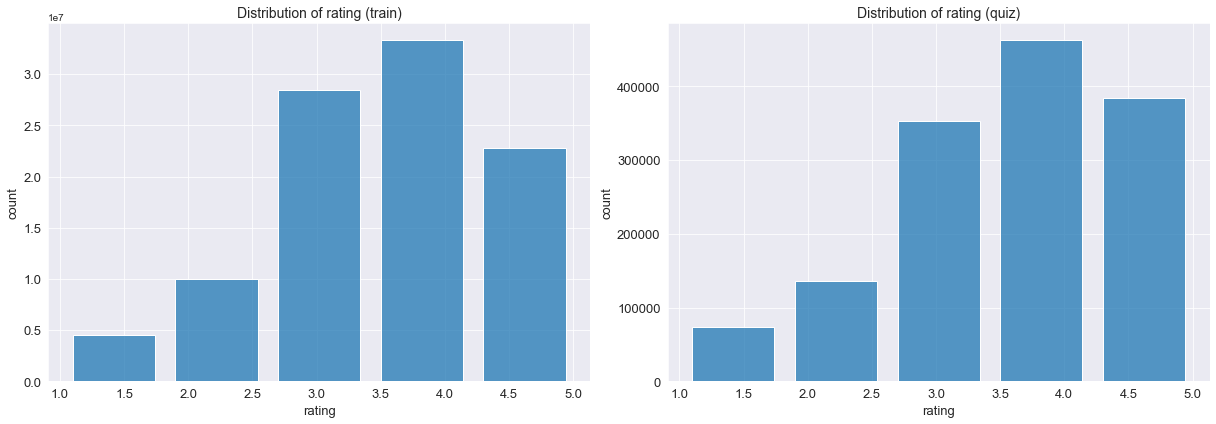

rating stats (quiz): DescribeResult(nobs=1408395, minmax=(1, 5), mean=3.6736284920068587, variance=1.2711045862421115, skewness=-0.6101165501129961, kurtosis=-0.3295795956291103)
Wall time: 41 s


In [4]:
%%time
sub_plot(train_target.rating, 'rating', 'train', 5,
         quiz_target.rating, 'rating', 'quiz', 5, 0.8, 0.8)

### Feature: Movie ID

movie_id stats (train): DescribeResult(nobs=99072112, minmax=(1, 17770), mean=9100.050181165008, variance=26256609.621147852, skewness=-0.03429797181921864, kurtosis=-1.2267528810497108)


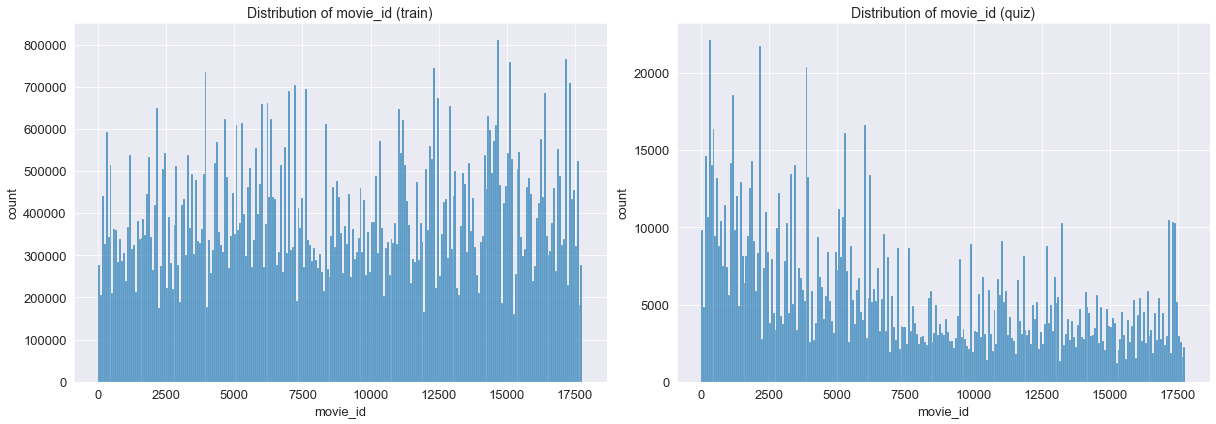

movie_id stats (quiz): DescribeResult(nobs=1408395, minmax=(1, 17770), mean=7021.4134053301805, variance=27682041.061360464, skewness=0.47739259408256096, kurtosis=-1.038155647807726)
Wall time: 46.1 s


In [5]:
%%time
sub_plot(train_features.mov_id, 'movie_id', 'train', 250,
         quiz_features.mov_id, 'movie_id', 'quiz', 250)

### Feature: Customer ID

customer_id stats (train): DescribeResult(nobs=99072112, minmax=(6, 2649429), mean=1322476.4615478874, variance=584499637094.7086, skewness=0.007886249980977247, kurtosis=-1.1994863284485833)


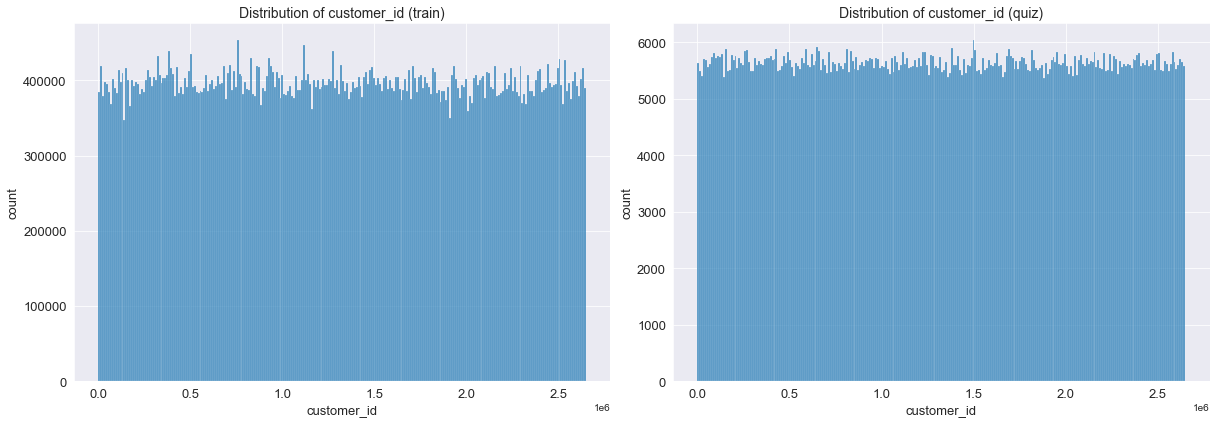

customer_id stats (quiz): DescribeResult(nobs=1408395, minmax=(6, 2649429), mean=1323335.8123196973, variance=585703745308.5533, skewness=0.002764419948486524, kurtosis=-1.2021636856230284)
Wall time: 45.4 s


In [6]:
%%time
sub_plot(train_features.cust_id, 'customer_id', 'train', 250,
         quiz_features.cust_id, 'customer_id', 'quiz', 250)

### Feature: Day Rated

day_rated stats (train): DescribeResult(nobs=99072112, minmax=(1, 2241), mean=1789.1139716290695, variance=142803.30910628932, skewness=-1.620833350036187, kurtosis=3.0594087603096165)


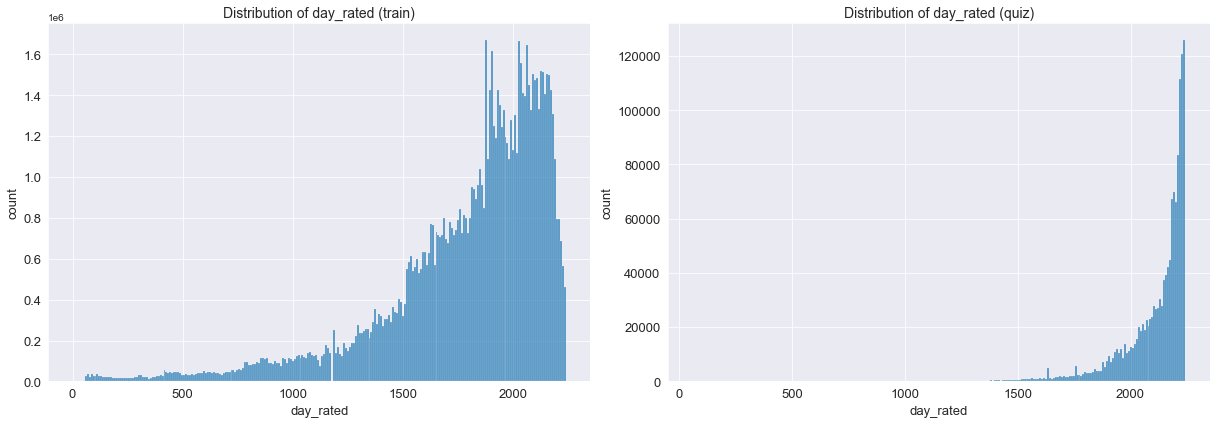

day_rated stats (quiz): DescribeResult(nobs=1408395, minmax=(58, 2241), mean=2107.41421618225, variance=28870.813690319334, skewness=-3.2958783080734135, kurtosis=18.847286849005584)
Wall time: 45.3 s


In [11]:
%%time
sub_plot(train_features.day_rated, 'day_rated', 'train', 250,
         quiz_features.day_rated, 'day_rated', 'quiz', 250)

### Feature Transformation: Day Rated Reflected Cube Root

day_rated reflected cbrt stats (train): DescribeResult(nobs=99072112, minmax=(1.0, 13.086212014364513), mean=7.113261523015604, variance=4.284512000462659, skewness=0.1731038134497557, kurtosis=-0.14588863778530747)


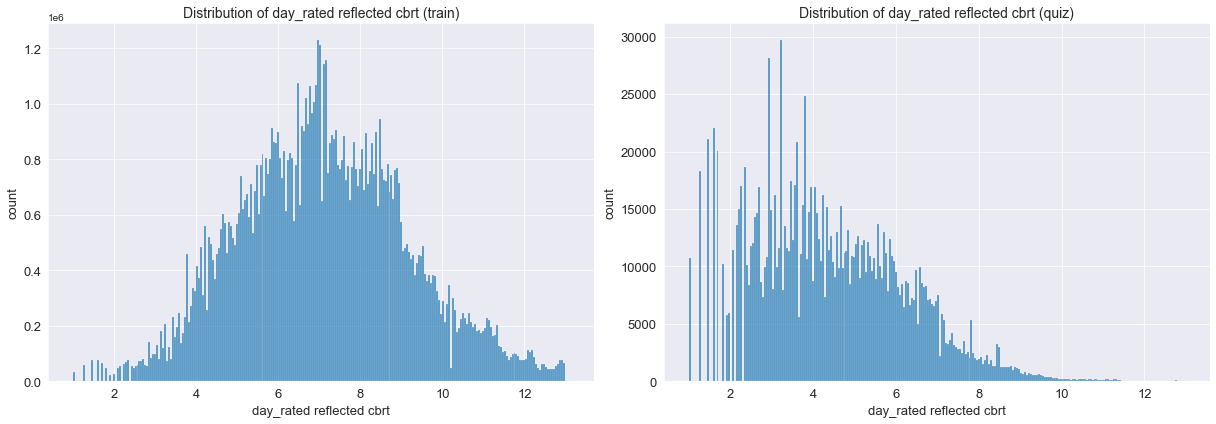

day_rated reflected cbrt stats (quiz): DescribeResult(nobs=1408395, minmax=(1.0, 12.974308233432701), mean=4.414203327070741, variance=3.4169429317805182, skewness=0.5264203862150956, kurtosis=0.096349017750895)
Wall time: 52.4 s


In [20]:
%%time
tday_trans = np.cbrt(train_features.day_rated.astype(np.float32)
                     .max() + 1 - train_features.day_rated.astype(np.float32))
qday_trans = np.cbrt(quiz_features.day_rated.astype(np.float32)
                     .max() + 1 - quiz_features.day_rated.astype(np.float32))
sub_plot(tday_trans, 'day_rated reflected cbrt', 'train', 250,
         qday_trans, 'day_rated reflected cbrt', 'quiz', 250)

### Feature: Movie Release Year

release year stats (train): DescribeResult(nobs=99072112, minmax=(1896, 2005), mean=1993.863571748627, variance=153.82849085242404, skewness=-2.1607808323900874, kurtosis=5.444194404534423)


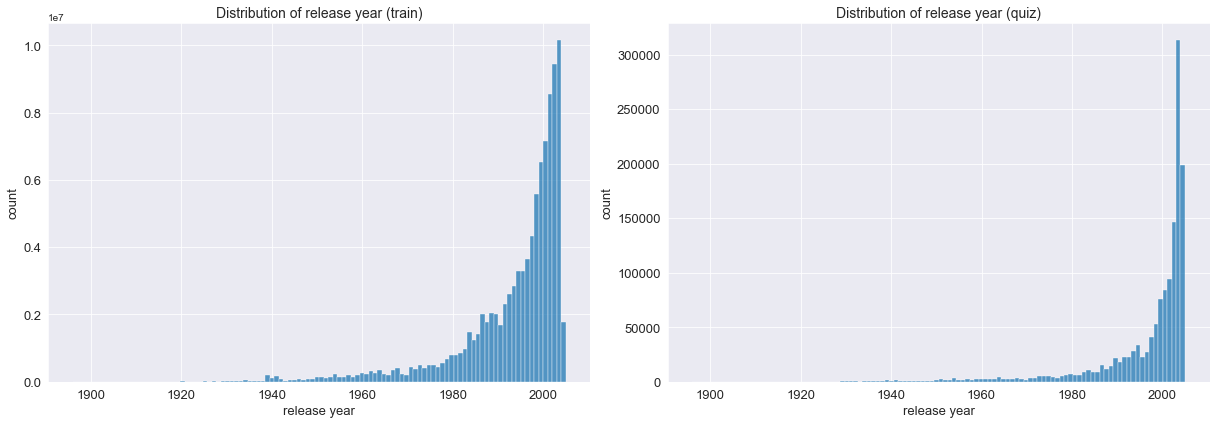

release year stats (quiz): DescribeResult(nobs=1408395, minmax=(1896, 2005), mean=1997.2874484785873, variance=138.7997833493186, skewness=-2.7052807977853695, kurtosis=8.319071704565422)
Wall time: 43.6 s


In [23]:
%%time
sub_plot(train_features.mov_year, 'release year', 'train', 110,
         quiz_features.mov_year, 'release year', 'quiz', 110)

### Feature Transformation: Movie Release Year (Tangent)

tan mov_year stats (train): DescribeResult(nobs=99072112, minmax=(-20.461441, 17.416637), mean=-0.16878389, variance=13.512199, skewness=1.6473573446273804, kurtosis=11.077846637522427)


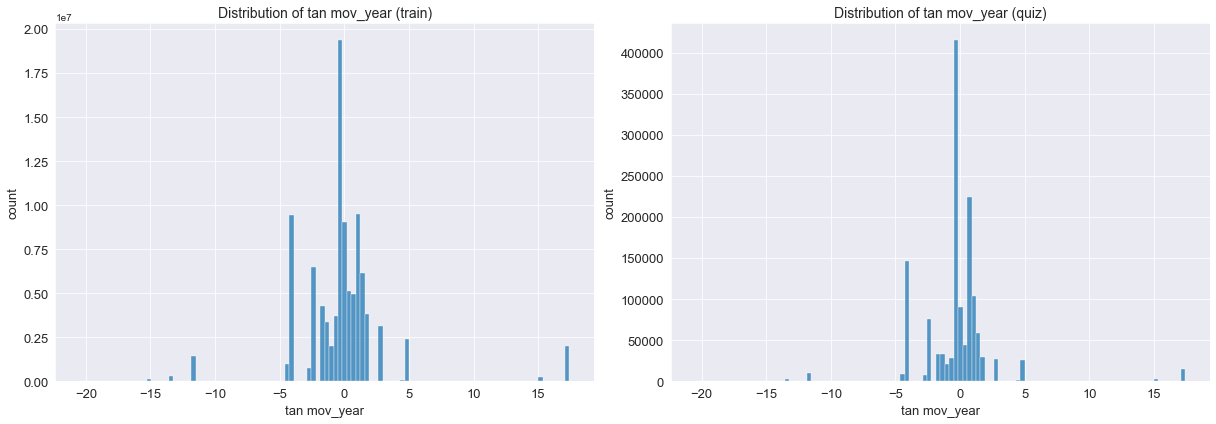

tan mov_year stats (quiz): DescribeResult(nobs=1408395, minmax=(-20.461441, 17.416637), mean=-0.26095045, variance=8.711909, skewness=1.771652102470398, kurtosis=16.060578452817975)
Wall time: 44.4 s


In [55]:
%%time
ttan_mov_year = np.tan(train_features.mov_year.astype(np.float32))
qtan_mov_year = np.tan(quiz_features.mov_year.astype(np.float32))
sub_plot(ttan_mov_year, 'tan mov_year', 'train', 110,
         qtan_mov_year, 'tan mov_year', 'quiz', 110)

### Feature Transformation: Release Year Squared

release year squared stats (train): DescribeResult(nobs=99072112, minmax=(-31535, 32676), mean=3736.066425403347, variance=241787646.79357213, skewness=-0.45020578735432104, kurtosis=-0.6366584045978287)


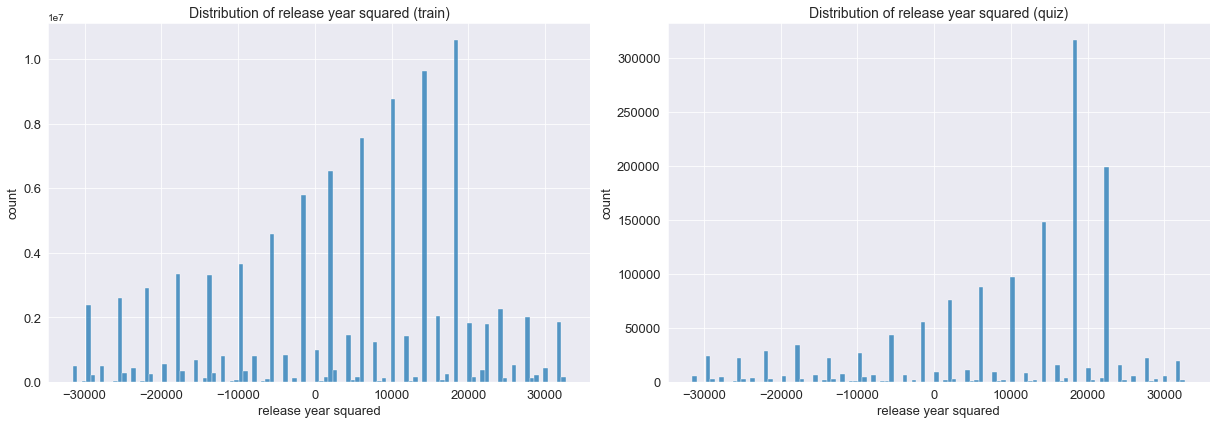

release year squared stats (quiz): DescribeResult(nobs=1408395, minmax=(-31535, 32676), mean=8968.914486347936, variance=214393426.11550608, skewness=-1.031550542877046, kurtosis=0.22382245234395404)
Wall time: 44.5 s


In [8]:
%%time
tbit_tran = (train_features.mov_year)**2
qbit_tran = (quiz_features.mov_year)**2
sub_plot(tbit_tran, 'release year squared', 'train', 110,
         qbit_tran, 'release year squared', 'quiz', 110)

### Feature Transformation: Release Year Reflected Cube Root

mov_year reflected cbrt stats (train): DescribeResult(nobs=99072112, minmax=(1.0, 4.791419857062785), mean=2.0909334285295067, variance=0.4422756176064511, skewness=0.7498561278949938, kurtosis=0.09996400661383786)


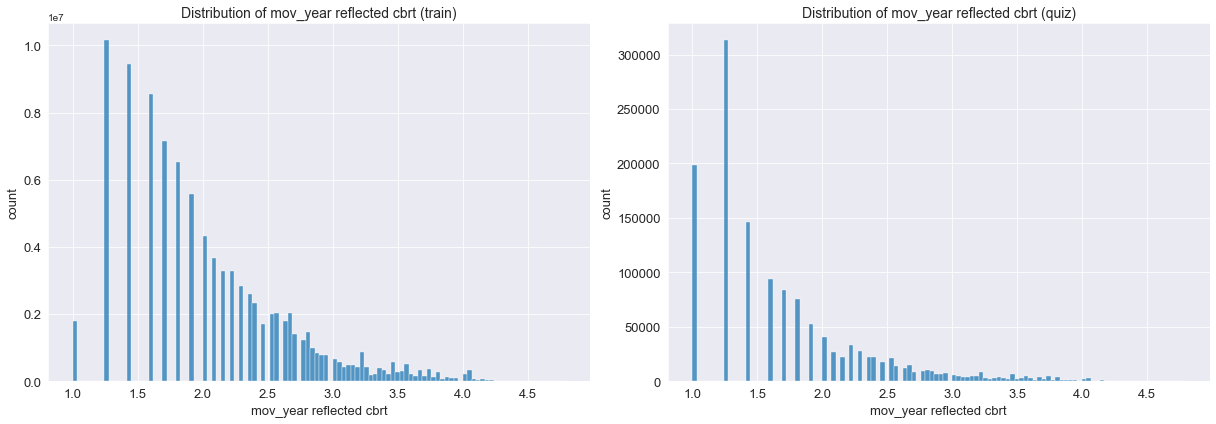

mov_year reflected cbrt stats (quiz): DescribeResult(nobs=1408395, minmax=(1.0, 4.791419857062785), mean=1.783979176084865, variance=0.49411300249125356, skewness=1.124103866596968, kurtosis=0.7537171598393346)
Wall time: 49.9 s


In [56]:
%%time
tyr_trans = np.cbrt(train_features.mov_year.astype(np.float32)
                     .max() + 1 - train_features.mov_year.astype(np.float32))
qyr_trans = np.cbrt(quiz_features.mov_year.astype(np.float32)
                     .max() + 1 - quiz_features.mov_year.astype(np.float32))
sub_plot(tyr_trans, 'mov_year reflected cbrt', 'train', 110,
         qyr_trans, 'mov_year reflected cbrt', 'quiz', 110)

### Feature: Mean Rating per Movie per Day

mean rating per movie per day stats (train): DescribeResult(nobs=99072112, minmax=(0.0013386881, 103.94645), mean=25.1018, variance=490.61542, skewness=0.8811427354812622, kurtosis=-0.006541091791147036)


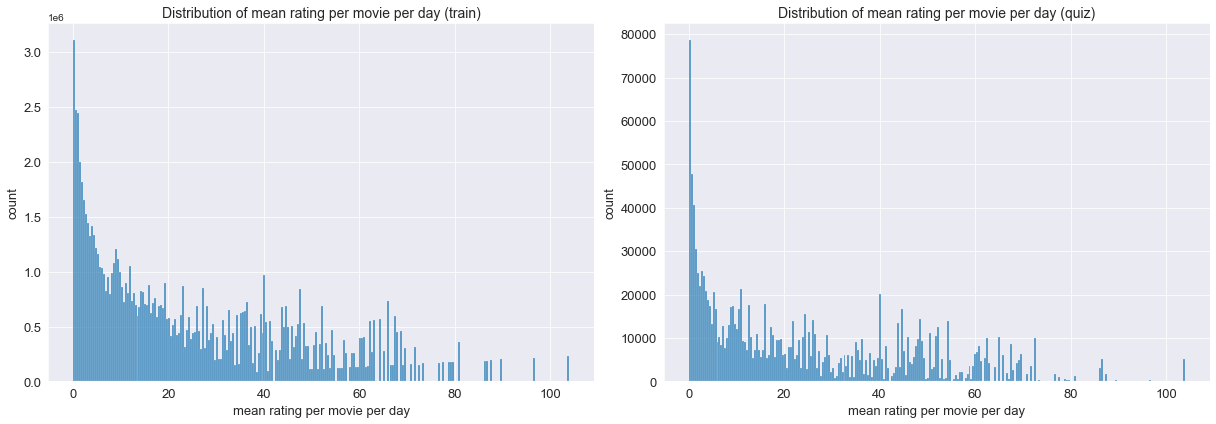

mean rating per movie per day stats (quiz): DescribeResult(nobs=1408395, minmax=(0.004462294, 103.94645), mean=24.033777, variance=489.22864, skewness=0.8605745434761047, kurtosis=-0.09087611060045608)
Wall time: 46.3 s


In [57]:
%%time
sub_plot(train_features.avg_rate_pm_pd, 'mean rating per movie per day', 'train', 250,
         quiz_features.avg_rate_pm_pd, 'mean rating per movie per day', 'quiz', 250)

### Feature Transformation: Mean Rating per Movie per Day Square Root

mean rating per movie per day sqrt stats (train): DescribeResult(nobs=99072112, minmax=(0.036588088, 10.195414), mean=4.428663, variance=5.488804, skewness=0.12841667234897614, kurtosis=-0.979238097836781)


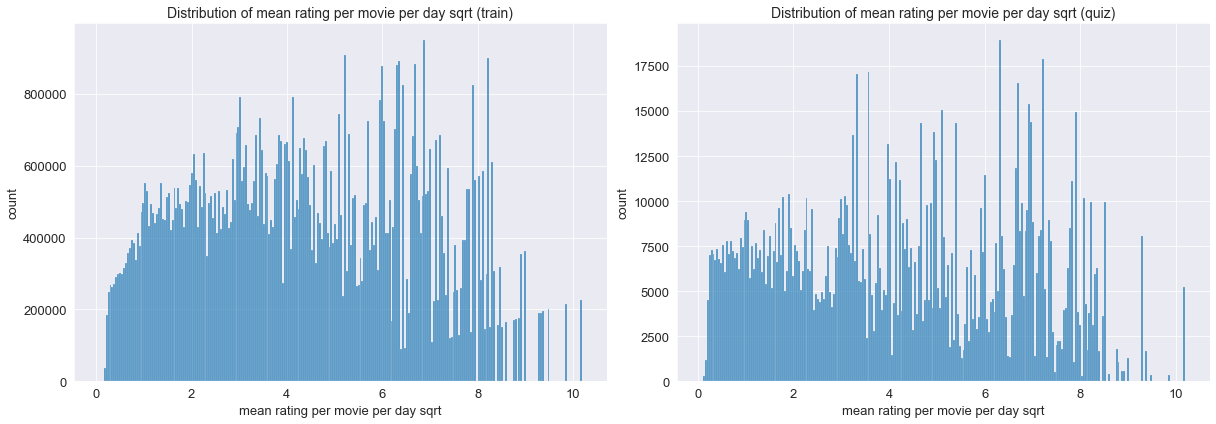

mean rating per movie per day sqrt stats (quiz): DescribeResult(nobs=1408395, minmax=(0.0668004, 10.195414), mean=4.2599854, variance=5.8863044, skewness=0.12287122756242752, kurtosis=-1.0752298856232547)
Wall time: 45.6 s


In [58]:
%%time
trpmpd_sqrt = np.sqrt(train_features.avg_rate_pm_pd.astype(np.float32))
qrpmpd_sqrt = np.sqrt(quiz_features.avg_rate_pm_pd.astype(np.float32))
sub_plot(trpmpd_sqrt, 'mean rating per movie per day sqrt', 'train', 250,
         qrpmpd_sqrt, 'mean rating per movie per day sqrt', 'quiz', 250)

### Feature: Mean Rating per Customer per Day

mean rating per customer per day stats (train): DescribeResult(nobs=99072112, minmax=(0.00044622936, 7.877287), mean=0.29103827, variance=0.1279551, skewness=8.701834678649902, kurtosis=143.7552054054698)


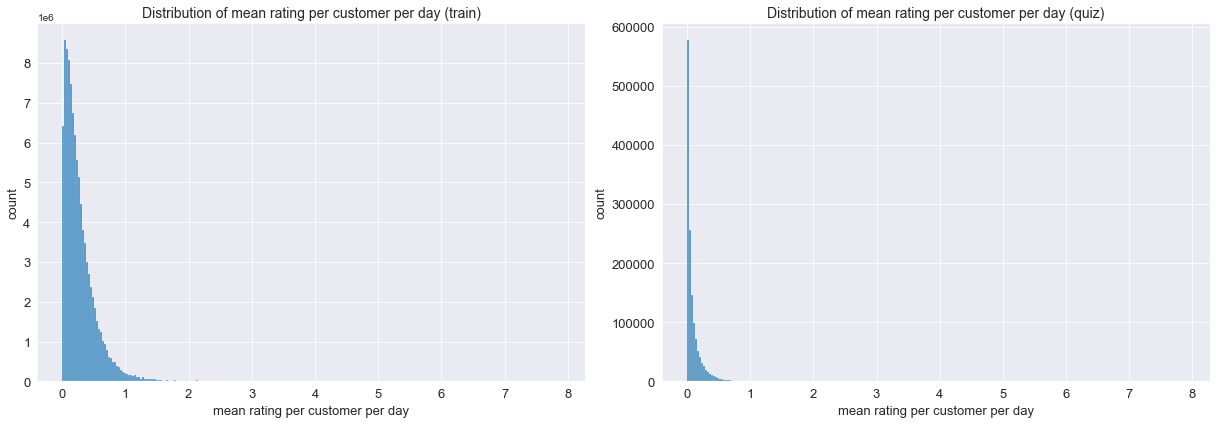

mean rating per customer per day stats (quiz): DescribeResult(nobs=1408395, minmax=(0.0008924587, 7.877287), mean=0.09582475, variance=0.018465593, skewness=5.518949031829834, kurtosis=125.74195826395399)
Wall time: 45.8 s


In [59]:
%%time
sub_plot(train_features.avg_rate_pc_pd, 'mean rating per customer per day', 'train', 250,
         quiz_features.avg_rate_pc_pd, 'mean rating per customer per day', 'quiz', 250)

### Feature Transformation: Mean Rating per Customer per Day Cube Root

mean rating per cust per day cbrt stats (train): DescribeResult(nobs=99072112, minmax=(0.076416306, 1.9897212), mean=0.6011035, variance=0.03813256, skewness=0.6826035976409912, kurtosis=2.3033828941931107)


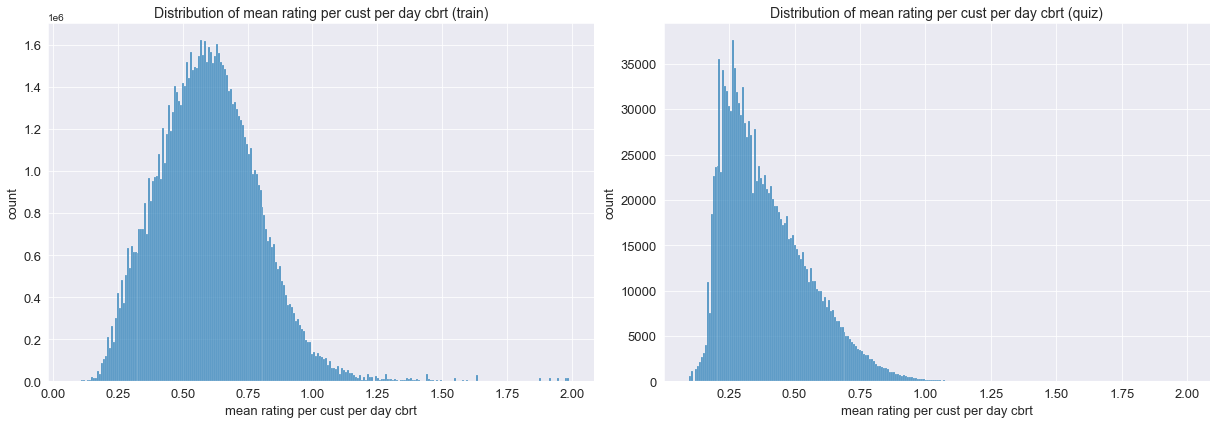

mean rating per cust per day cbrt stats (quiz): DescribeResult(nobs=1408395, minmax=(0.09627852, 1.9897212), mean=0.39231527, variance=0.026654733, skewness=0.935696542263031, kurtosis=0.7428890546736198)
Wall time: 48.6 s


In [60]:
%%time
trpcpd_cbrt = np.cbrt(train_features.avg_rate_pc_pd.astype(np.float32))
qrpcpd_cbrt = np.cbrt(quiz_features.avg_rate_pc_pd.astype(np.float32))
sub_plot(trpcpd_cbrt, 'mean rating per cust per day cbrt', 'train', 250,
         qrpcpd_cbrt, 'mean rating per cust per day cbrt', 'quiz', 250)

### Feature: Total Ratings per Day per Customer

cust_day_count stats (train): DescribeResult(nobs=99072112, minmax=(1, 5446), mean=77.05963032260784, variance=20541.162091840604, skewness=8.250533536556636, kurtosis=173.70317876000712)


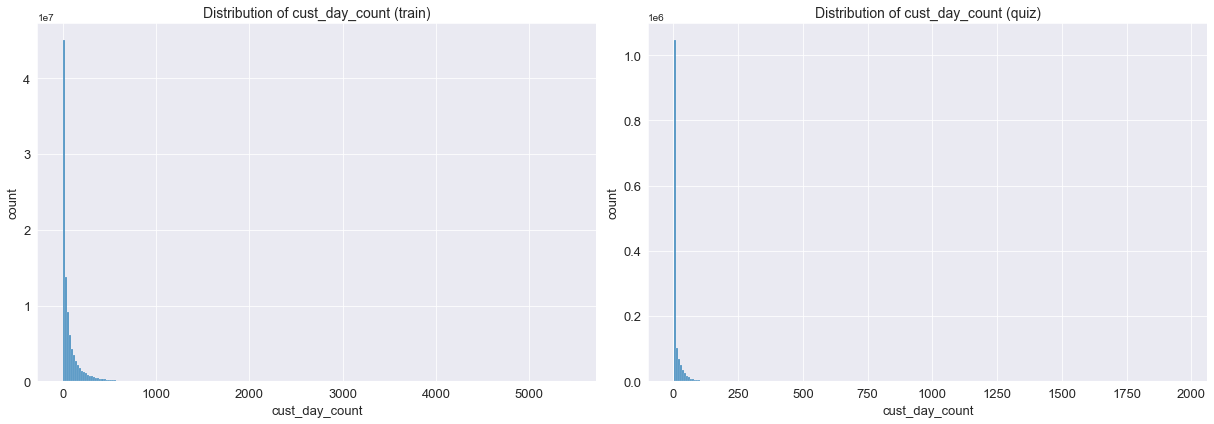

cust_day_count stats (quiz): DescribeResult(nobs=1408395, minmax=(1, 1963), mean=11.492762328750102, variance=824.4037343050296, skewness=9.567960921921072, kurtosis=214.8878227691702)
Wall time: 43.6 s


In [61]:
%%time
sub_plot(train_features.cust_day_count, 'cust_day_count', 'train', 250,
         quiz_features.cust_day_count, 'cust_day_count', 'quiz', 250)

### Feature Transformation: Total Ratings per Day per Customer Cube Root

cust_day_count cbrt stats (train): DescribeResult(nobs=99072112, minmax=(1.0, 17.593782), mean=3.3335605, variance=3.4291825, skewness=0.9008629322052002, kurtosis=0.8862833200021294)


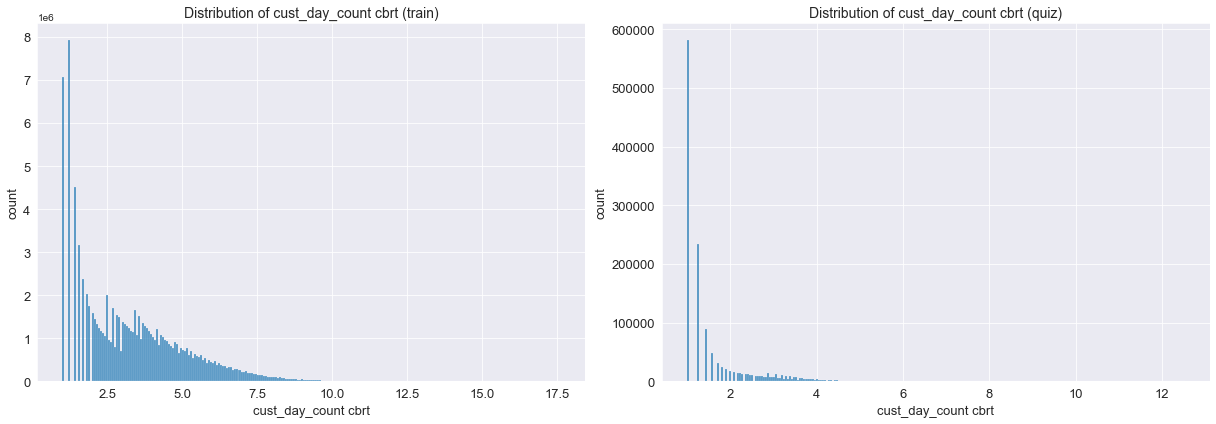

cust_day_count cbrt stats (quiz): DescribeResult(nobs=1408395, minmax=(1.0, 12.521031), mean=1.6950818, variance=0.9627354, skewness=1.8277384042739868, kurtosis=3.7852750620655318)
Wall time: 47.4 s


In [62]:
%%time
tcdc_3rt = np.cbrt(train_features.cust_day_count.astype(np.float32))
qcdc_3rt = np.cbrt(quiz_features.cust_day_count.astype(np.float32))
sub_plot(tcdc_3rt, 'cust_day_count cbrt', 'train', 250,
         qcdc_3rt, 'cust_day_count cbrt', 'quiz', 250)

### Feature: Days Since Customer First Rating

days since cust first rating stats (train): DescribeResult(nobs=99072112, minmax=(0, 2187), mean=266.721756148693, variance=121821.23897336436, skewness=1.896708774322171, kurtosis=3.8276306853233093)


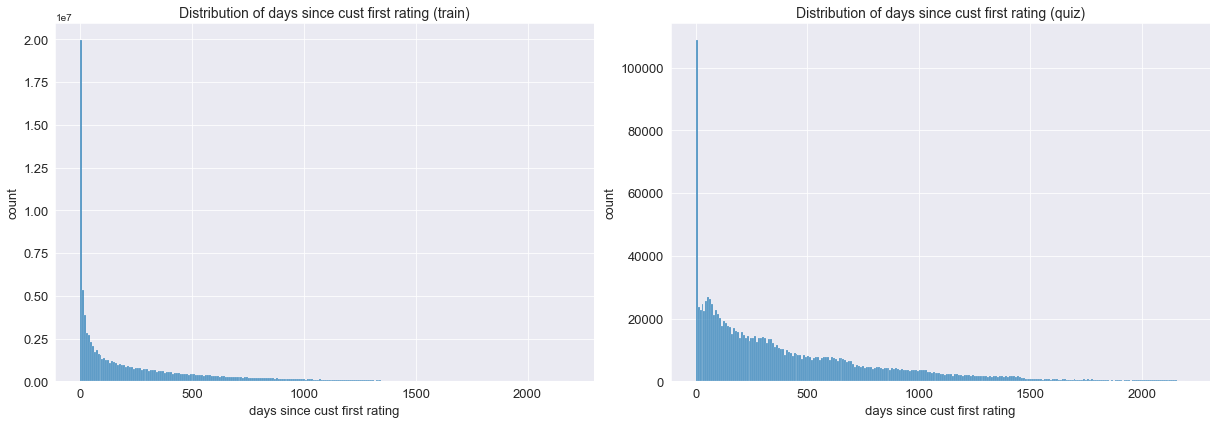

days since cust first rating stats (quiz): DescribeResult(nobs=1408395, minmax=(0, 2195), mean=423.860387888341, variance=177750.09465761003, skewness=1.4156187933320148, kurtosis=1.880353885755964)
Wall time: 45 s


In [63]:
%%time
sub_plot(train_features.cust_days_since, 'days since cust first rating', 'train', 250,
         quiz_features.cust_days_since, 'days since cust first rating', 'quiz', 250)

### Feature: Days Since Movie First Rating

days since movie first rating stats (train): DescribeResult(nobs=99072112, minmax=(0, 2240), mean=1087.0305109575133, variance=420190.69511100766, skewness=0.04208450919484206, kurtosis=-1.392920153863649)


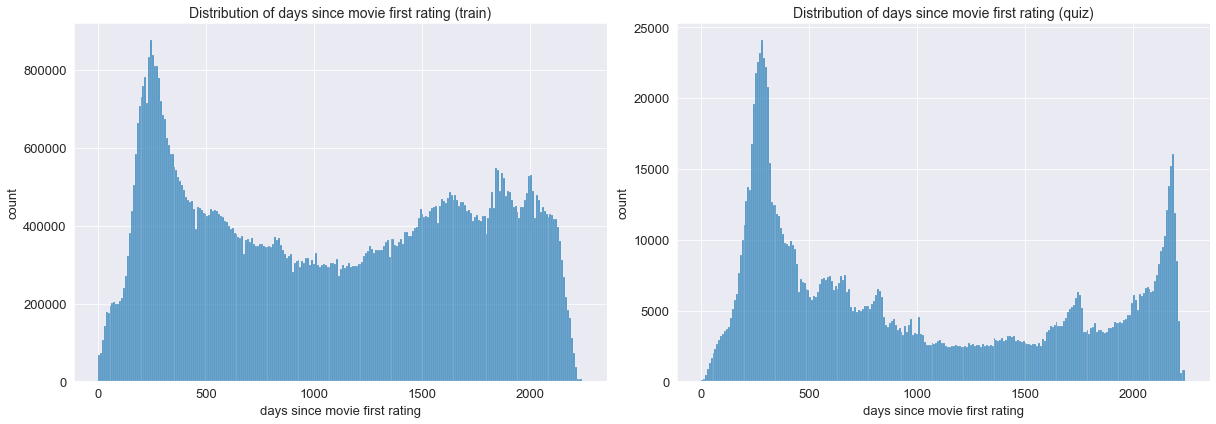

days since movie first rating stats (quiz): DescribeResult(nobs=1408395, minmax=(0, 2240), mean=983.6566360999577, variance=496463.5261879595, skewness=0.46380950557940476, kurtosis=-1.3165448082562394)
Wall time: 46 s


In [64]:
%%time
sub_plot(train_features.mov_days_since, 'days since movie first rating', 'train', 250,
         quiz_features.mov_days_since, 'days since movie first rating', 'quiz', 250)

### Feature: Movie Average Rating

movie average rating stats (train): DescribeResult(nobs=99072112, minmax=(1.2913386, 4.722741), mean=3.603311, variance=0.1553342, skewness=-0.23860755562782288, kurtosis=0.5366173679380908)


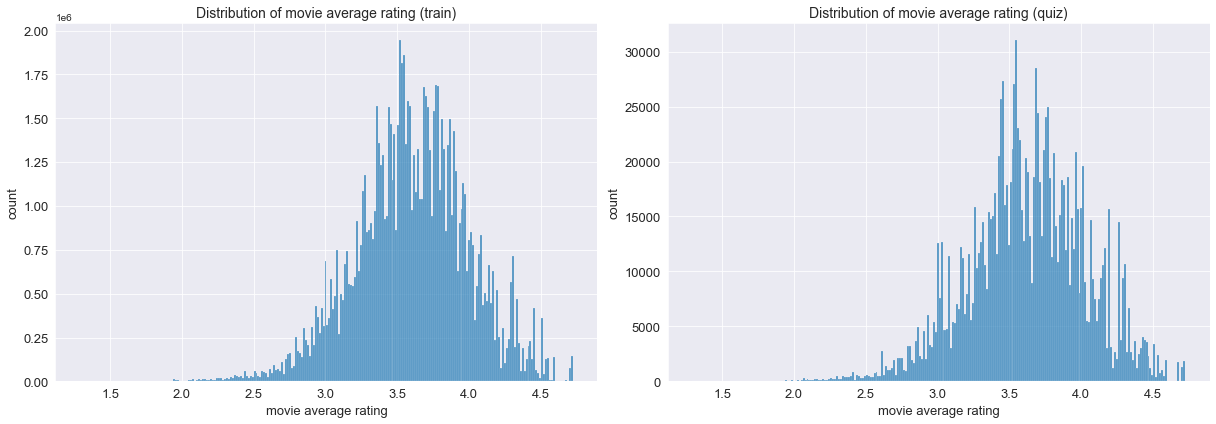

movie average rating stats (quiz): DescribeResult(nobs=1408395, minmax=(1.2913386, 4.722741), mean=3.622872, variance=0.16801189, skewness=-0.2974688708782196, kurtosis=0.5160353943935623)
Wall time: 46 s


In [65]:
%%time
sub_plot(train_features.mov_avg_rating, 'movie average rating', 'train', 250,
         quiz_features.mov_avg_rating, 'movie average rating', 'quiz', 250)

### Feature: Customer Average Rating

customer average rating stats (train): DescribeResult(nobs=99072112, minmax=(1.0, 5.0), mean=3.6033037, variance=0.19165155, skewness=-0.23373806476593018, kurtosis=1.2026034940343218)


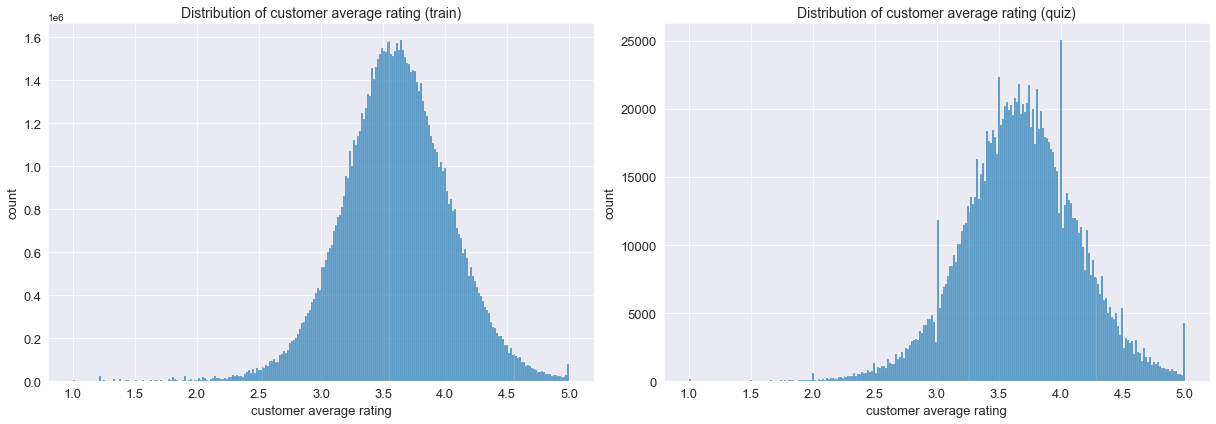

customer average rating stats (quiz): DescribeResult(nobs=1408395, minmax=(1.0, 5.0), mean=3.6746755, variance=0.21870334, skewness=-0.18435534834861755, kurtosis=0.7528578217526403)
Wall time: 46.6 s


In [66]:
%%time
sub_plot(train_features.cust_avg_rating, 'customer average rating', 'train', 250,
         quiz_features.cust_avg_rating, 'customer average rating', 'quiz', 250)

### Feature: Daily Average Rating per Movie

daily average rating per movie stats (train): DescribeResult(nobs=99072112, minmax=(1.0, 5.0), mean=3.6033127, variance=0.27452916, skewness=-0.8352286219596863, kurtosis=2.770347764524769)


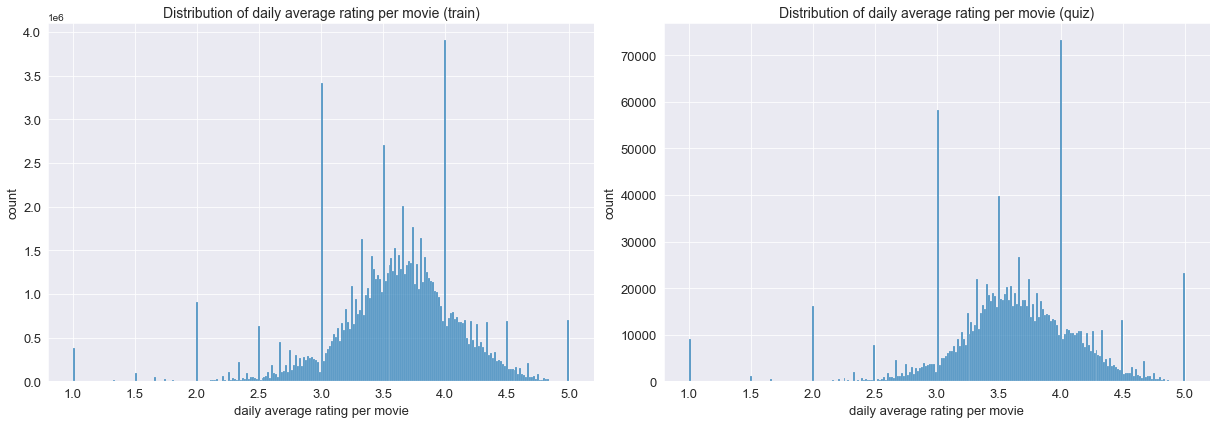

daily average rating per movie stats (quiz): DescribeResult(nobs=1408395, minmax=(1.0, 5.0), mean=3.6310036, variance=0.306394, skewness=-0.8312045335769653, kurtosis=3.303080148558318)
Wall time: 45.9 s


In [67]:
%%time
sub_plot(train_features.mov_day_avg, 'daily average rating per movie', 'train', 250,
         quiz_features.mov_day_avg, 'daily average rating per movie', 'quiz', 250)

### Feature: Average Rating per Customer per Day

customer avg rating per day stats (train): DescribeResult(nobs=99072112, minmax=(1.0, 5.0), mean=3.6033015, variance=0.43276432, skewness=-0.5152571797370911, kurtosis=1.2330796334011982)


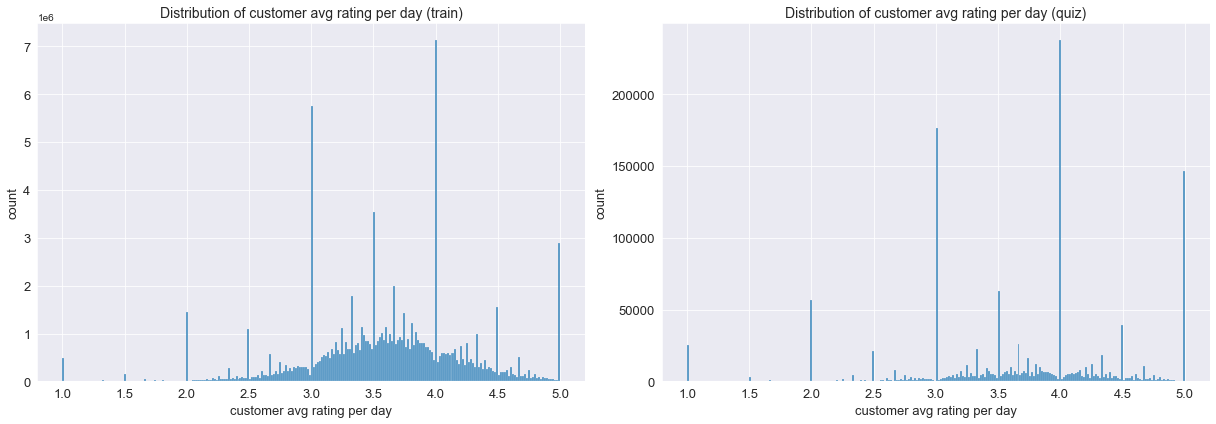

customer avg rating per day stats (quiz): DescribeResult(nobs=1408395, minmax=(1.0, 5.0), mean=3.68305, variance=0.7140284, skewness=-0.6505509614944458, kurtosis=0.6797664754344486)
Wall time: 45.9 s


In [68]:
%%time
sub_plot(train_features.cust_day_avg,
         'customer avg rating per day',
         'train', 250, quiz_features.cust_day_avg,
         'customer avg rating per day', 'quiz', 250)

### Feature: Average Rating per Movie Release Year

avg rating per release year stats (train): DescribeResult(nobs=99072112, minmax=(2.8037384, 4.030442), mean=3.6032853, variance=0.010018862, skewness=1.2622934579849243, kurtosis=1.5188297062461489)


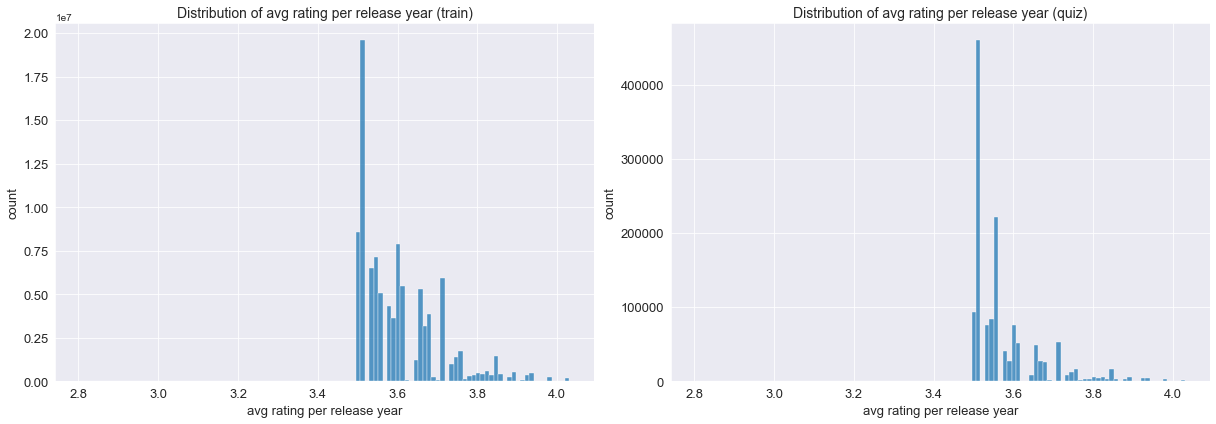

avg rating per release year stats (quiz): DescribeResult(nobs=1408395, minmax=(2.8037384, 4.030442), mean=3.5778756, variance=0.0083617335, skewness=1.8700404167175293, kurtosis=3.5896741369708236)
Wall time: 42.8 s


In [70]:
%%time
sub_plot(train_features.avg_rate_yr,
         'avg rating per release year',
         'train', 110, quiz_features.avg_rate_yr,
         'avg rating per release year', 'quiz', 110)

### Feature Transformation: Average Rating per Release Year Cube Root

avg rating per release year cbrt stats (train): DescribeResult(nobs=99072112, minmax=(1.4100866, 1.5914178), mean=1.5330694, variance=0.00019712267, skewness=1.1862924098968506, kurtosis=1.2993412957905708)


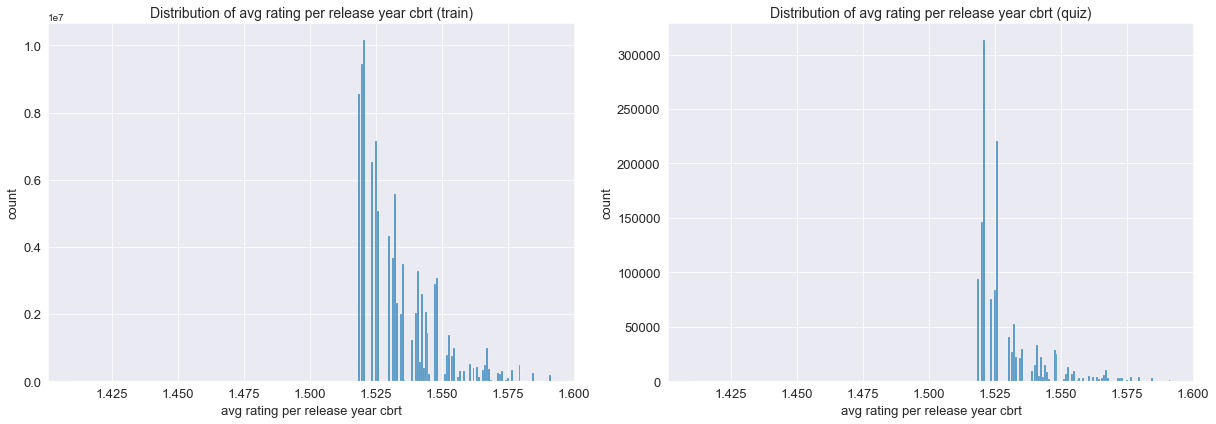

avg rating per release year cbrt stats (quiz): DescribeResult(nobs=1408395, minmax=(1.4100866, 1.5914178), mean=1.5293645, variance=0.00016468958, skewness=1.8187650442123413, kurtosis=3.3422433903089726)
Wall time: 46.5 s


In [72]:
%%time
tary_3rt = np.cbrt(train_features.avg_rate_yr)
qary_3rt = np.cbrt(quiz_features.avg_rate_yr)
sub_plot(tary_3rt, 'avg rating per release year cbrt', 'train', 250,
         qary_3rt, 'avg rating per release year cbrt', 'quiz', 250)

### Feature: Average Rating per Customer per Release Year

avg rating per customer per release year stats (train): DescribeResult(nobs=99072112, minmax=(1.0, 5.0), mean=3.60331, variance=0.34847984, skewness=-0.17707887291908264, kurtosis=1.0672498793070195)


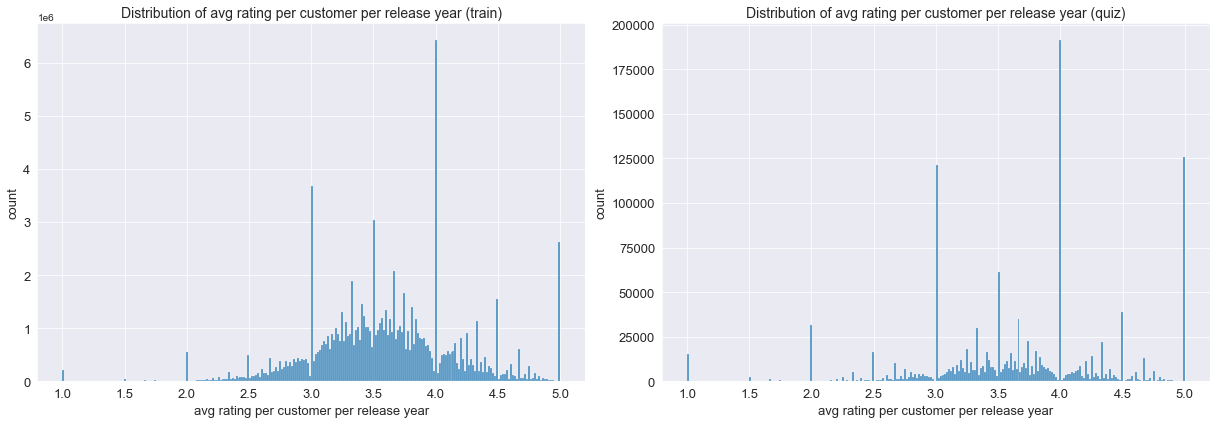

avg rating per customer per release year stats (quiz): DescribeResult(nobs=1408395, minmax=(1.0, 5.0), mean=3.6674957, variance=0.5813122, skewness=-0.4549172818660736, kurtosis=0.8641176596126474)
Wall time: 46.2 s


In [71]:
%%time
sub_plot(train_features.avg_rate_cst_yr,
         'avg rating per customer per release year',
         'train', 250, quiz_features.avg_rate_cst_yr,
         'avg rating per customer per release year', 'quiz', 250)

### Feature: Principal Components from Training and Quiz Sets

principal component from training features stats (train): DescribeResult(nobs=99072112, minmax=(-2.1359916, 4.549699), mean=1.7424943e-08, variance=1.0013145, skewness=0.9859243035316467, kurtosis=0.9583453267898148)


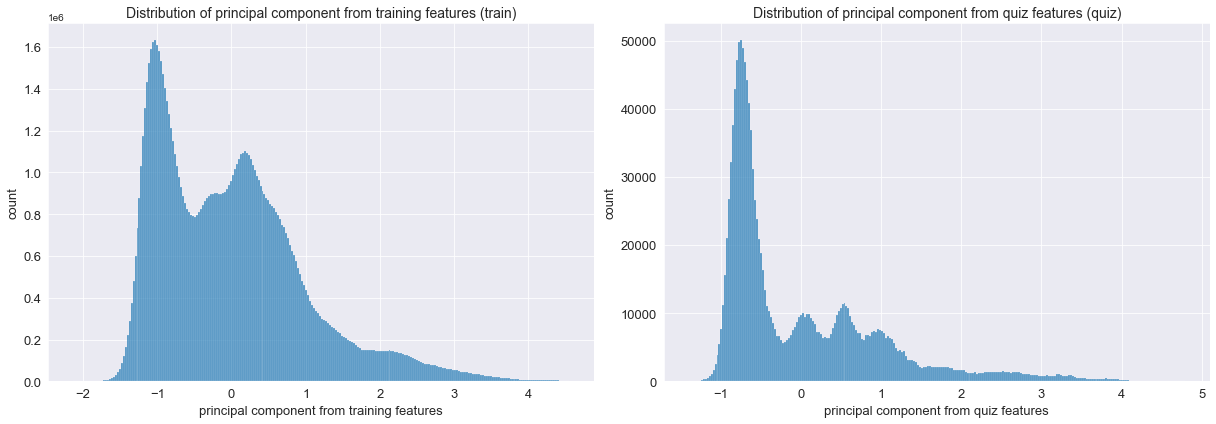

principal component from quiz features stats (quiz): DescribeResult(nobs=1408395, minmax=(-1.4004145, 4.788058), mean=6.2567325e-09, variance=1.0000031, skewness=1.4833412170410156, kurtosis=2.035826035346801)
Wall time: 46.9 s


In [73]:
%%time
sub_plot(train_features.train_pc,
         'principal component from training features',
         'train', 250, quiz_features.quiz_pc,
         'principal component from quiz features', 'quiz', 250)

### Feature Transformed: Principal Components from Training and Quiz Sets Yeo-Johnson

principal component from training features sqrt stats (train): DescribeResult(nobs=99072112, minmax=(-3.2923825, 2.4365914), mean=-0.20243584, variance=0.87170434, skewness=0.10859774798154831, kurtosis=-0.8125180356206338)


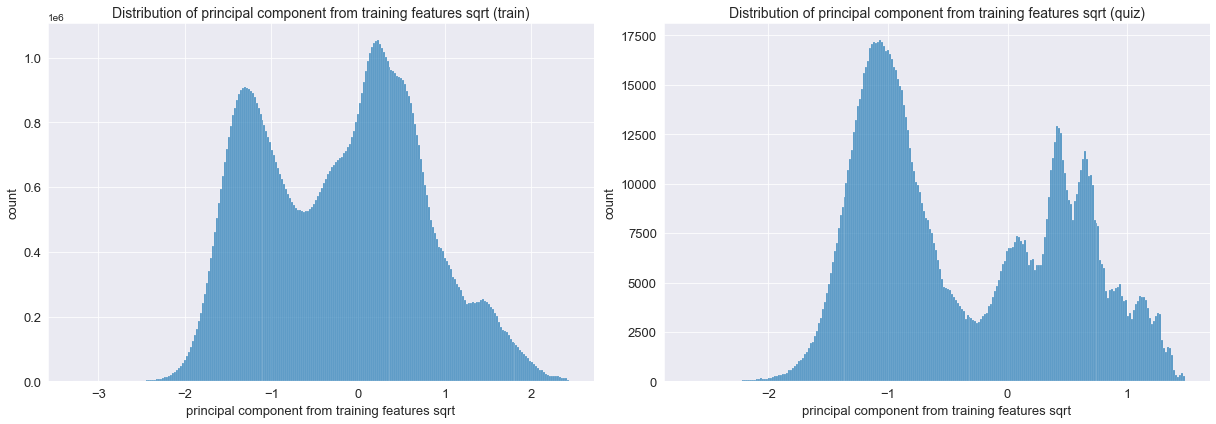

principal component from training features sqrt stats (quiz): DescribeResult(nobs=1408395, minmax=(-2.6650612, 1.4812623), mean=-0.35681054, variance=0.68616277, skewness=0.2989443838596344, kurtosis=-1.2434586967933918)


In [9]:
tyj_pc,_ = yj(train_features.train_pc.astype(np.float32))
qyj_pc,_ = yj(quiz_features.quiz_pc.astype(np.float32))
sub_plot(tyj_pc, 'principal component from training features sqrt', 'train', 250,
         qyj_pc, 'principal component from training features sqrt', 'quiz', 250)

### Feature: Baseline Approximation

baseline approximation stats (train): DescribeResult(nobs=99072112, minmax=(0.16254936, 6.7465034), mean=3.6033032, variance=0.10480445, skewness=-0.6206852197647095, kurtosis=4.900155152452586)


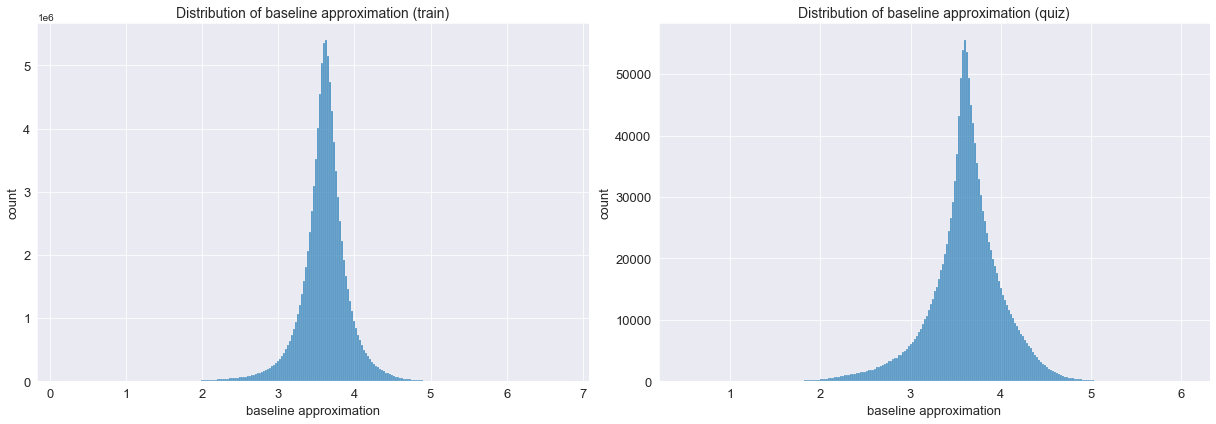

baseline approximation stats (quiz): DescribeResult(nobs=1408395, minmax=(0.4847561, 6.0361843), mean=3.6115575, variance=0.16787654, skewness=-0.5226029753684998, kurtosis=2.184788974935289)
Wall time: 46.4 s


In [76]:
%%time
sub_plot(train_features.bline_approx, 'baseline approximation', 'train', 250,
         quiz_features.bline_approx, 'baseline approximation', 'quiz', 250)

### Feature: Baseline Approximation in 5 Bins
The idea here is to compare the shape of the approximation to the distribution of true ratings. This approximation clearly favors the mean rating, but the distribution is much more narrow.

baseline approximation stats (train): DescribeResult(nobs=99072112, minmax=(0.16254936, 6.7465034), mean=3.6033032, variance=0.10480445, skewness=-0.6206852197647095, kurtosis=4.900155152452586)


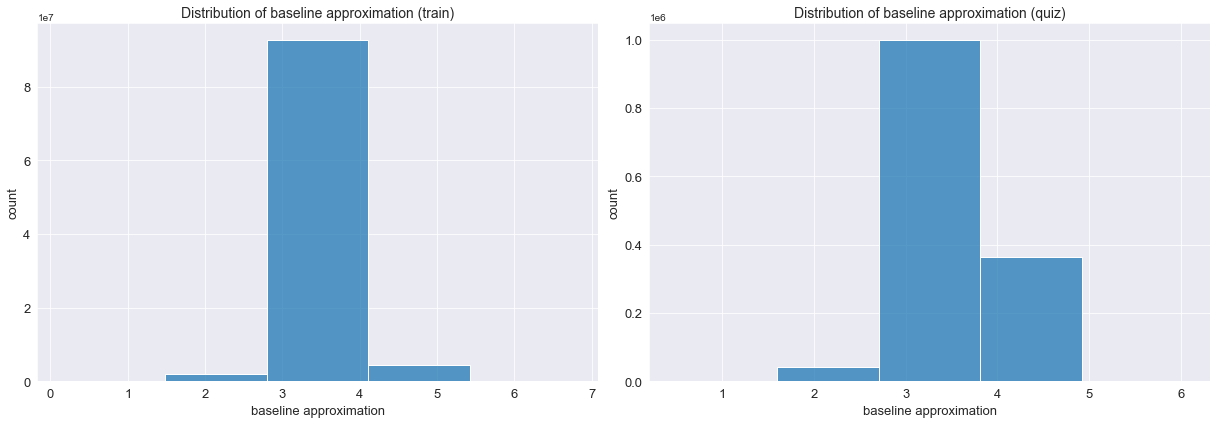

baseline approximation stats (quiz): DescribeResult(nobs=1408395, minmax=(0.4847561, 6.0361843), mean=3.6115575, variance=0.16787654, skewness=-0.5226029753684998, kurtosis=2.184788974935289)
Wall time: 45.5 s


In [77]:
%%time
sub_plot(train_features.bline_approx, 'baseline approximation', 'train', 5,
         quiz_features.bline_approx, 'baseline approximation', 'quiz', 5)

In [10]:
%%time
# all transformations done above consolidated into 1 notebook cell
tday_trans = np.cbrt(train_features.day_rated.astype(np.float32)
                     .max() + 1 - train_features.day_rated.astype(np.float32))
qday_trans = np.cbrt(quiz_features.day_rated.astype(np.float32)
                     .max() + 1 - quiz_features.day_rated.astype(np.float32))

ttan_mov_year = np.tan(train_features.mov_year.astype(np.float32))
qtan_mov_year = np.tan(quiz_features.mov_year.astype(np.float32))

tbit_tran = (train_features.mov_year)**2
qbit_tran = (quiz_features.mov_year)**2

tyr_trans = np.cbrt(train_features.mov_year.astype(np.float32)
                     .max() + 1 - train_features.mov_year.astype(np.float32))
qyr_trans = np.cbrt(quiz_features.mov_year.astype(np.float32)
                     .max() + 1 - quiz_features.mov_year.astype(np.float32))

trpcpd_cbrt = np.cbrt(train_features.avg_rate_pc_pd.astype(np.float32))
qrpcpd_cbrt = np.cbrt(quiz_features.avg_rate_pc_pd.astype(np.float32))

tcdc_3rt = np.cbrt(train_features.cust_day_count.astype(np.float32))
qcdc_3rt = np.cbrt(quiz_features.cust_day_count.astype(np.float32))

tary_3rt = np.cbrt(train_features.avg_rate_yr)
qary_3rt = np.cbrt(quiz_features.avg_rate_yr)

Wall time: 19.7 s


In [ ]:
tyj_pc,_ = yj(train_features.train_pc.astype(np.float32))
qyj_pc,_ = yj(quiz_features.quiz_pc.astype(np.float32))

In [11]:
%%time
# create training df of transformed variables
train_trans = pd.DataFrame({'tday_trans': tday_trans, 'ttan_mov_year': ttan_mov_year,
                            'tbit_tran': tbit_tran, 'tyr_trans': tyr_trans,
                            'trpcpd_cbrt': trpcpd_cbrt, 'tcdc_3rt': tcdc_3rt,
                            'tary_3rt': tary_3rt, 'tyj_pc': tyj_pc})

Wall time: 2.23 s


In [12]:
%%time
# create quiz df of transformed variables
quiz_trans = pd.DataFrame({'qday_trans': qday_trans, 'qtan_mov_year': qtan_mov_year,
                           'qbit_tran': qbit_tran, 'qyr_trans': qyr_trans,
                           'qrpcpd_cbrt': qrpcpd_cbrt, 'qcdc_3rt': qcdc_3rt,
                           'qary_3rt': qary_3rt, 'qyj_pc': qyj_pc})

Wall time: 29 ms


In [13]:
%%time
train_trans.to_parquet('train_trans.parquet')
quiz_trans.to_parquet('quiz_trans.parquet')

Wall time: 11.3 s
